# Import

## Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasgui as pdgui
from sklearn.model_selection import LearningCurveDisplay
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import RidgeCV

## Import data

In [14]:
df = pd.read_excel("maroun.xlsx",sheet_name='moshtarak')
df.head(3)

,sazman ab rain,khanzenyan rain,ghalat rain,maroun rain
0,8.5,20.0,10.5,11.0
1,25.0,40.0,55.0,49.0
2,16.5,28.0,55.0,55.0


In [95]:
print (f"Shape: {df.shape}")

Shape: (264, 4)


In [96]:
from sklearn.model_selection import train_test_split

# Data (Pre) process

In [16]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df,test_size=0.3, shuffle=False)

In [17]:
train.head(10)

,sazman ab rain,khanzenyan rain,ghalat rain,maroun rain
0,8.5,20.0,10.5,11.0
1,25.0,40.0,55.0,49.0
2,16.5,28.0,55.0,55.0
3,7.5,23.0,2.0,22.0
4,3.0,27.0,29.0,26.0
5,1.5,20.0,28.0,26.5
6,61.5,26.5,40.0,40.5
7,25.5,46.0,58.0,58.5
8,2.0,15.0,30.0,22.0
9,1.5,19.0,26.5,28.5


In [18]:
test.head(2)

,sazman ab rain,khanzenyan rain,ghalat rain,maroun rain
184,58.3,40.0,82.0,66.0
185,3.7,1.0,2.0,5.0


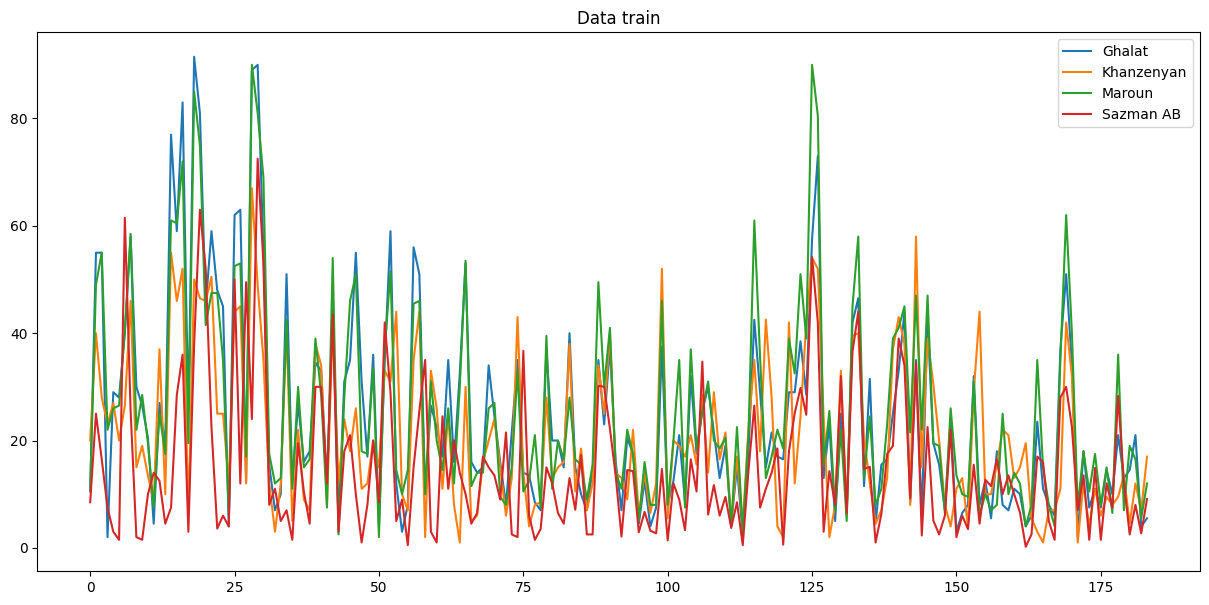

In [100]:
plt.figure(figsize=(15,7))
plt.title("Data train")
plt.plot(train["ghalat rain"], label="Ghalat")
plt.plot(train["khanzenyan rain"], label="Khanzenyan")
plt.plot(train["maroun rain"], label="Maroun")
plt.plot(train["sazman ab rain"], label= "Sazman AB")
plt.legend()

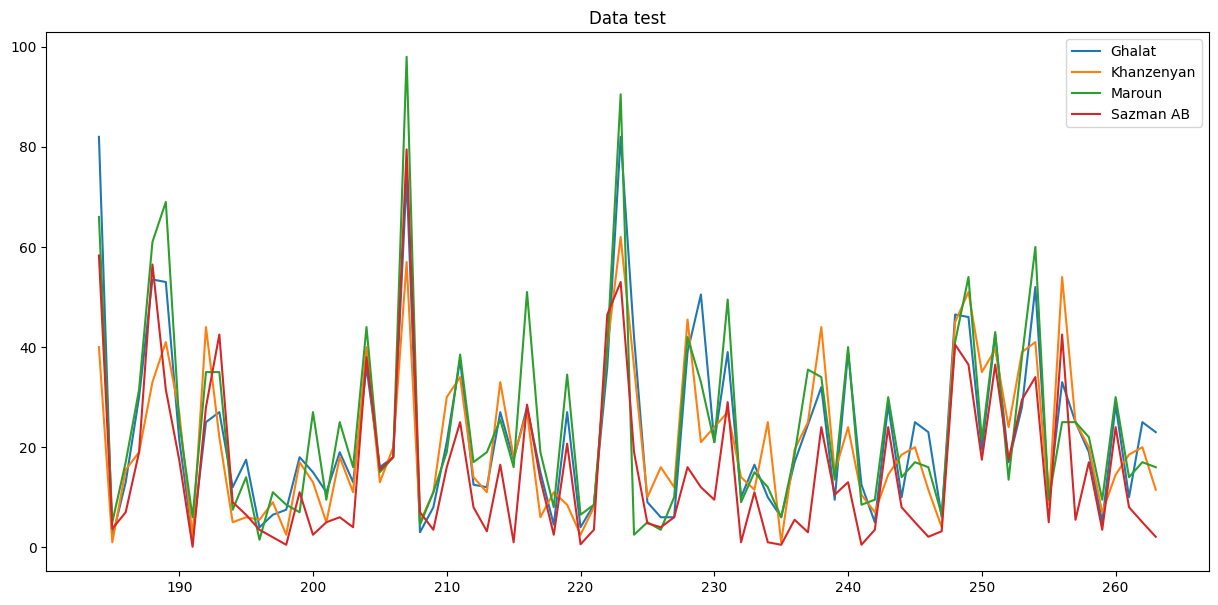

In [101]:
plt.figure(figsize=(15,7))
plt.title("Data test")
plt.plot(test["ghalat rain"], label="Ghalat")
plt.plot(test["khanzenyan rain"], label="Khanzenyan")
plt.plot(test["maroun rain"], label="Maroun")
plt.plot(test["sazman ab rain"], label= "Sazman AB")
plt.legend()

In [21]:
# normal
from sklearn.preprocessing import RobustScaler

# create an object from class RobustScaler
Havij = RobustScaler()

In [23]:
Havij

RobustScaler()

In [39]:
train_scaled = Havij.fit_transform(train)
df_train_scaled = pd.DataFrame(train_scaled,columns=train.columns)
df_train_scaled.head(2)

,sazman ab rain,khanzenyan rain,ghalat rain,maroun rain
0,-0.169231,0.171429,-0.324873,-0.358209
1,0.846154,1.085714,1.482234,1.154229


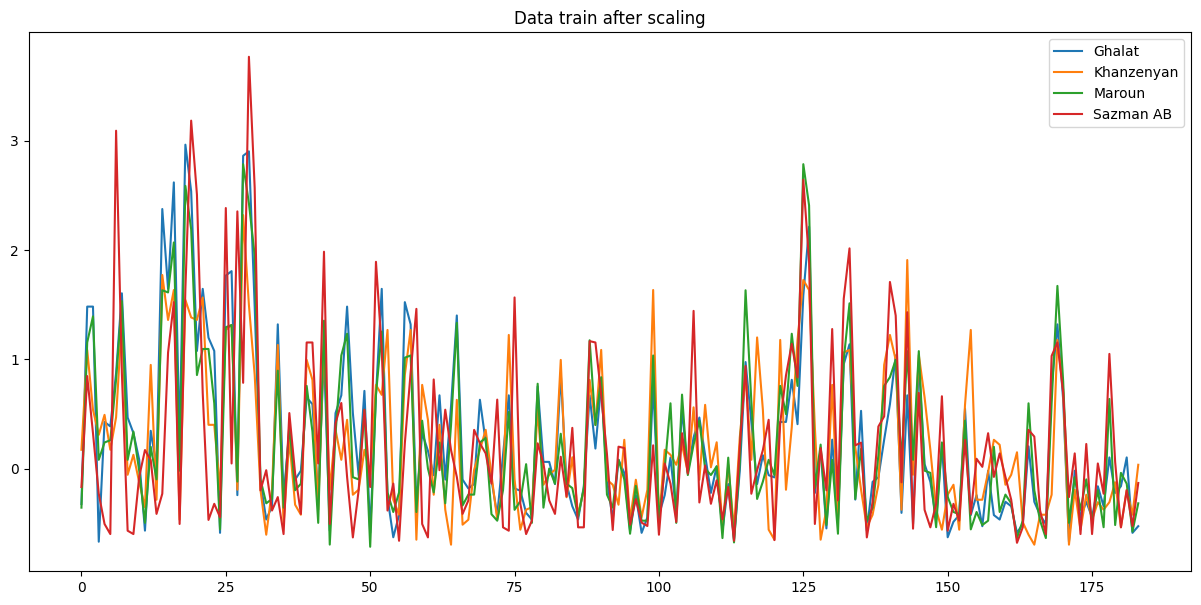

In [40]:
plt.figure(figsize=(15,7))
plt.title("Data train after scaling")
plt.plot(df_train_scaled["ghalat rain"], label="Ghalat")
plt.plot(df_train_scaled["khanzenyan rain"], label="Khanzenyan")
plt.plot(df_train_scaled["maroun rain"], label="Maroun")
plt.plot(df_train_scaled["sazman ab rain"], label= "Sazman AB")
plt.legend()

In [ ]:
test_scaled = Havij.transform(test)

In [38]:
df_test_scaled = pd.DataFrame(test_scaled, columns=test.columns)
df_test_scaled

,sazman ab rain,khanzenyan rain,ghalat rain,maroun rain
0,2.895385,1.085714,2.578680,1.830846
1,-0.464615,-0.697143,-0.670051,-0.597015
2,-0.261538,-0.034286,-0.223350,-0.119403
3,0.476923,0.125714,0.467005,0.457711
4,2.784615,0.765714,1.421320,1.631841
...,...,...,...,...
75,-0.476923,-0.422857,-0.548223,-0.417910
76,0.784615,-0.080000,0.406091,0.398010
77,-0.200000,0.102857,-0.345178,-0.238806
78,-0.384615,0.171429,0.263959,-0.119403


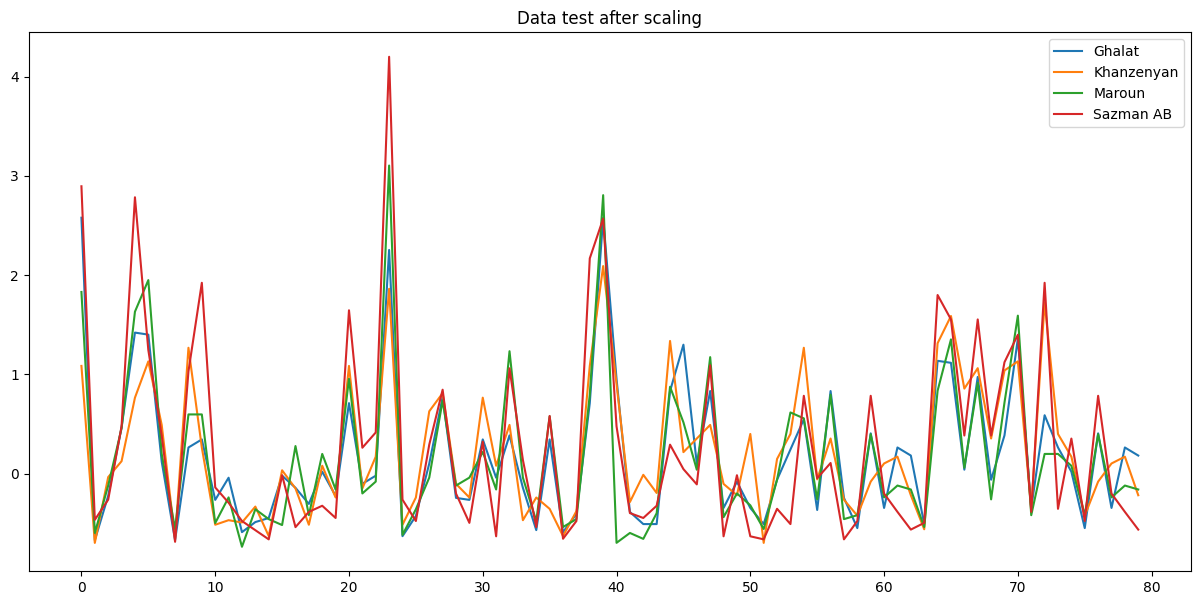

In [41]:
plt.figure(figsize=(15,7))
plt.title("Data test after scaling")
plt.plot(df_test_scaled["ghalat rain"], label="Ghalat")
plt.plot(df_test_scaled["khanzenyan rain"], label="Khanzenyan")
plt.plot(df_test_scaled["maroun rain"], label="Maroun")
plt.plot(df_test_scaled["sazman ab rain"], label= "Sazman AB")
plt.legend()

جدا کردن ورودی ها از خروجی مدل

In [19]:
X_train = train[['sazman ab rain', 'khanzenyan rain', 'ghalat rain', ]]
y_train = train['maroun rain']

X_test = test[['sazman ab rain', 'khanzenyan rain', 'ghalat rain', ]]
y_test = test['maroun rain']

In [20]:
# for sklearn, y must be in format series and x can be in format dataframe
print (f"Type X_train: {type(X_train)}",
       f"\nType X_test: {type(X_test)}",
       f"\nType y_train: {type(y_train)}",
       f"\nType y_test: {type(y_test)}"
       )

Type X_train: <class 'pandas.core.frame.DataFrame'> 
Type X_test: <class 'pandas.core.frame.DataFrame'> 
Type y_train: <class 'pandas.core.series.Series'> 
Type y_test: <class 'pandas.core.series.Series'>


In [539]:
# this cell is for save the train and test data
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

In [21]:
print (f"X_train rows: {X_train.shape[0]}",
       f"\nX_train columns: {X_train.shape[1]}")
display (X_train.head(5))

X_train rows: 184 
X_train columns: 3


,sazman ab rain,khanzenyan rain,ghalat rain
0,8.5,20.0,10.5
1,25.0,40.0,55.0
2,16.5,28.0,55.0
3,7.5,23.0,2.0
4,3.0,27.0,29.0


In [105]:
print (f"X_test rows: {X_test.shape[0]}",
       f"\nX_test columns: {X_test.shape[1]}")
display (X_test.head(5))

X_test rows: 80 
X_test columns: 3


,sazman ab rain,khanzenyan rain,ghalat rain
184,58.3,40.0,82.0
185,3.7,1.0,2.0
186,7.0,15.5,13.0
187,19.0,19.0,30.0
188,56.5,33.0,53.5


In [106]:
print (f"y_train rows: {y_train.shape[0]}")
display (y_train.head(5))

y_train rows: 184


0    11.0
1    49.0
2    55.0
3    22.0
4    26.0
Name: maroun rain, dtype: float64

In [107]:
print (f"y_test rows: {X_test.shape[0]}")
display (y_test.head(5))

y_test rows: 80


184    66.0
185     5.0
186    17.0
187    31.5
188    61.0
Name: maroun rain, dtype: float64

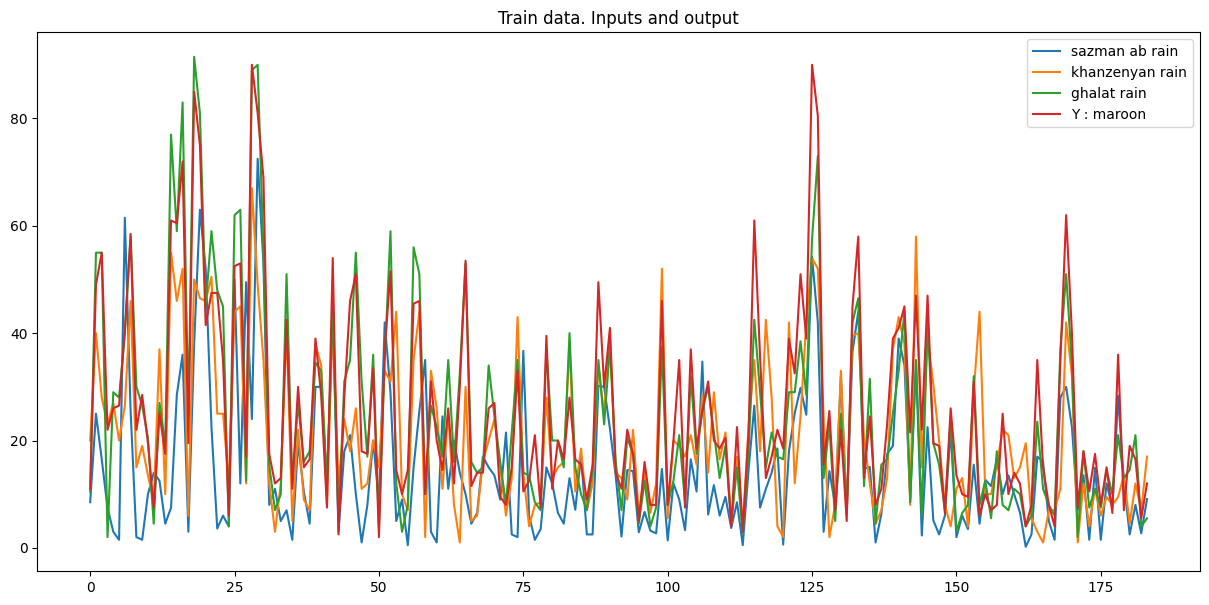

In [108]:
plt.figure(figsize=(15,7))
plt.plot(X_train, label = X_train.columns)
plt.plot(y_train,label="Y : maroon")
plt.title("Train data. Inputs and output")
plt.legend()

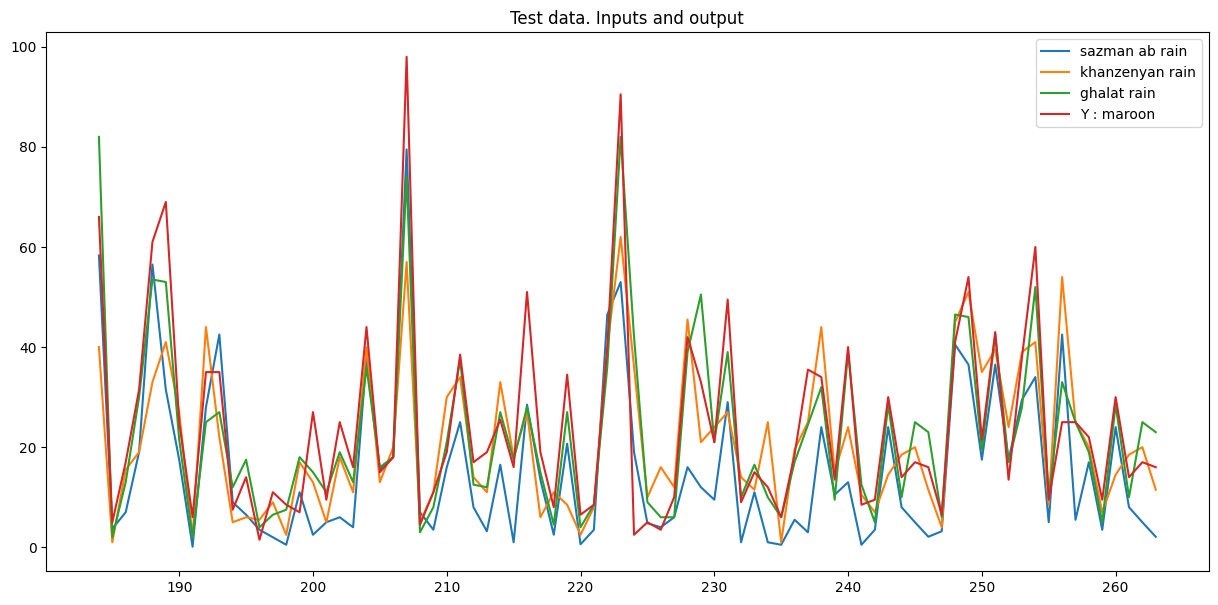

In [109]:
plt.figure(figsize=(15,7))
plt.plot(X_test, label = X_train.columns)
plt.plot(y_test,label="Y : maroon")
plt.title("Test data. Inputs and output")
plt.legend()

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
rf = RandomForestRegressor(n_estimators     =1000,
                           criterion        ='squared_error',
                           max_depth        =15,
                           min_samples_split=2,
                           min_samples_leaf =1,
                           verbose          =0,
                           oob_score        =True,
                           random_state     =22)

In [112]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 1.42 s
Wall time: 2.36 s


RandomForestRegressor(max_depth=15, n_estimators=1000, oob_score=True,
                      random_state=22)

In [113]:
print (f"R^2 for the training data is: {round(rf.score(X=X_train, y=y_train),3)}")

R^2 for the training data is: 0.981


Text(0.05, 0.9, 'R^2 for the training data is: 0.981')

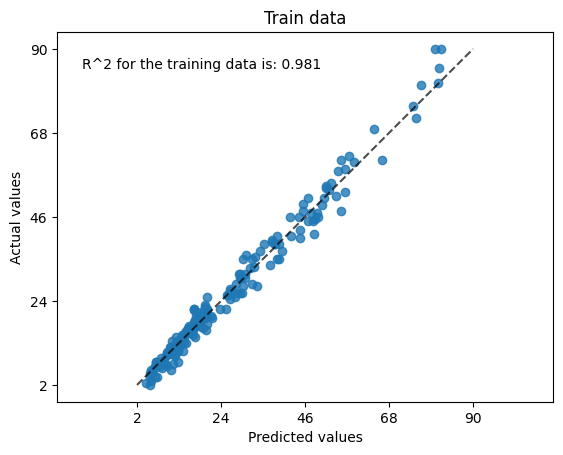

In [114]:
disp = PredictionErrorDisplay.from_estimator(estimator=rf,
                                             X=X_train,
                                             y=y_train,
                                             kind='actual_vs_predicted')
plt.title("Train data")
plt.annotate(text=f"R^2 for the training data is: {round(rf.score(X=X_train, y=y_train),3)}",
             xy=(0.05,0.9),
             xycoords="axes fraction")

In [72]:
from sklearn.metrics import r2_score

In [115]:
predictions = rf.predict(X_test)

In [119]:
predictions=pd.DataFrame(predictions,index=y_test.index)

In [120]:
print (f"R^2 for the test data is: {round(r2_score(y_true=y_test, y_pred=predictions),3)}")

R^2 for the test data is: 0.83


Text(0.05, 0.9, 'R^2 for the test data is: 0.83')

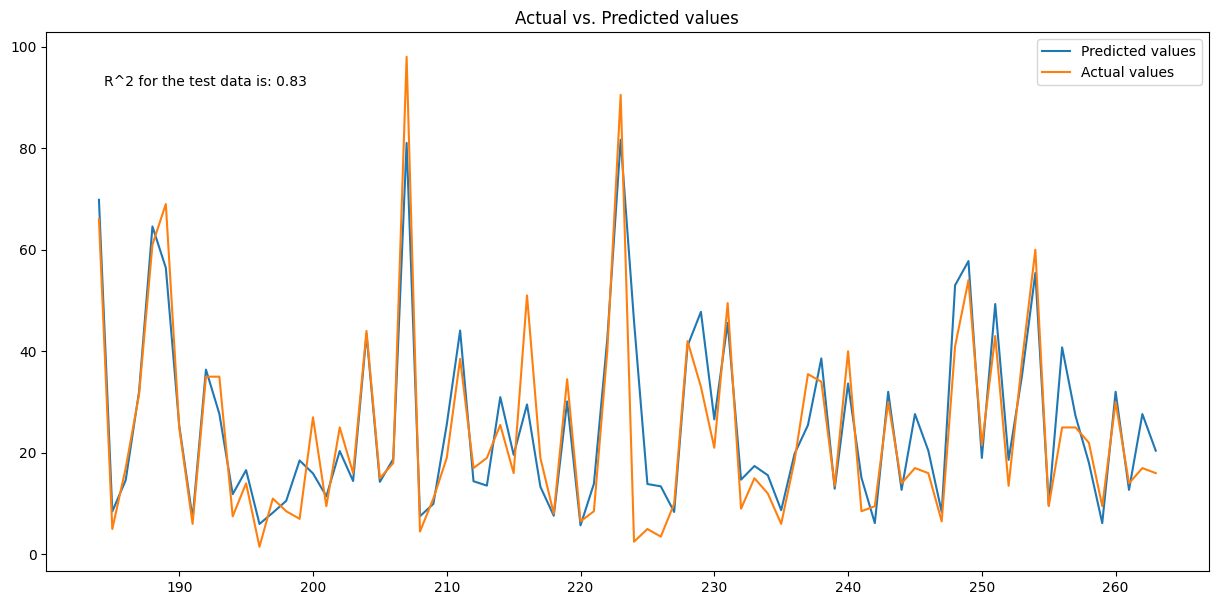

In [121]:
plt.figure(figsize=(15, 7))
plt.plot(predictions, label="Predicted values")
plt.plot(y_test, label="Actual values")
plt.title("Actual vs. Predicted values")
plt.legend()
plt.annotate(text=f"R^2 for the test data is: {round(r2_score(y_true=y_test, y_pred=predictions),3)}",
             xy=(0.05,0.9),
             xycoords="axes fraction")

# Prediction for missed.xlsx

In [9]:
voroodi = pd.read_excel("missed.xlsx", sheet_name="missed")
voroodi = voroodi[["sazman ab rain", "khanzenyan rain", "ghalat rain"]]
voroodi

,sazman ab rain,khanzenyan rain,ghalat rain
0,6.4,13.0,10.5
1,11.3,13.0,26.5
2,0.4,10.0,18.0
3,2.0,18.0,29.0
4,21.0,10.0,13.0
...,...,...,...
311,26.0,72.0,129.5
312,77.5,28.0,48.0
313,5.0,28.0,42.0
314,38.5,10.0,5.5


In [146]:
khorooji = rf.predict(X=voroodi)

In [147]:
khorooji = pd.DataFrame(khorooji,index=voroodi.index,columns=["maroon"])
khorooji.head()

,maroon
0,11.862375
1,26.591500
2,17.348417
3,27.858000
4,12.725167


Text(0, 0.5, 'mm')

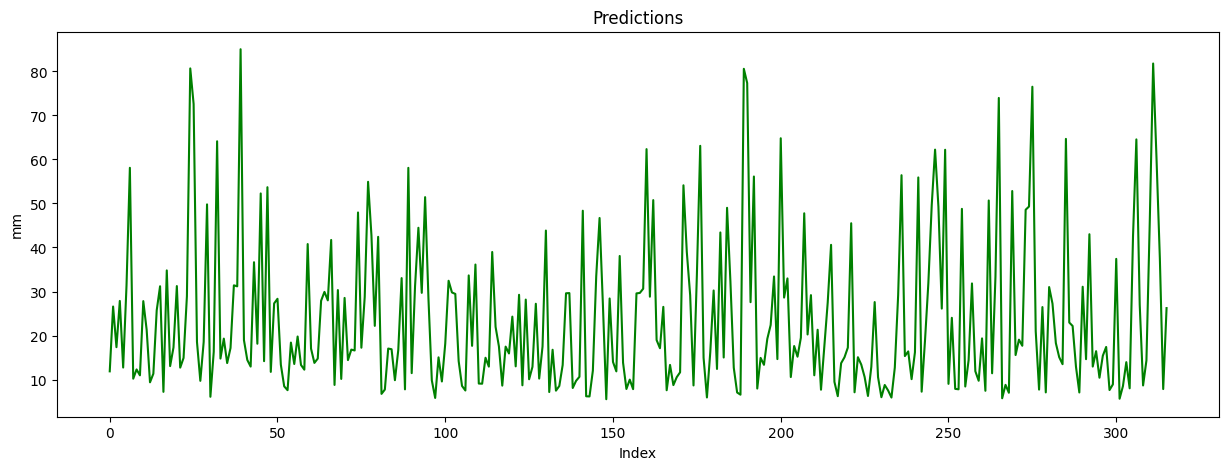

In [148]:
plt.figure(figsize=(15,5))
plt.plot(khorooji, color="green", ls="solid")
plt.title("Predictions")
plt.xlabel("Index")
plt.ylabel("mm")

Save the predicted values to xlsx file

In [149]:
khorooji.to_excel("khorooji.xlsx")

C:\Users\alikh\AppData\Local\Temp\ipykernel_2724\2357156229.py:32: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


[0.98, 0.98, 0.98]


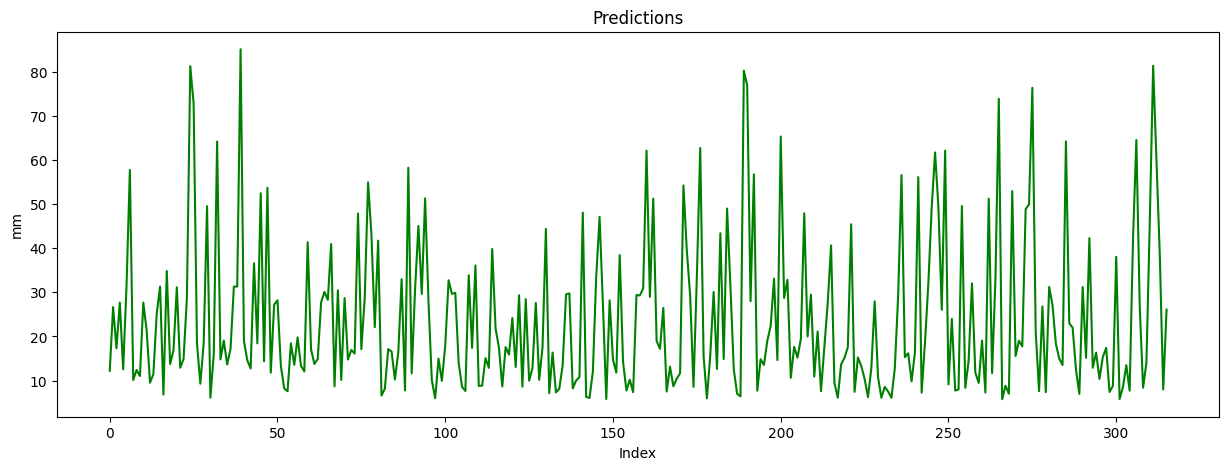

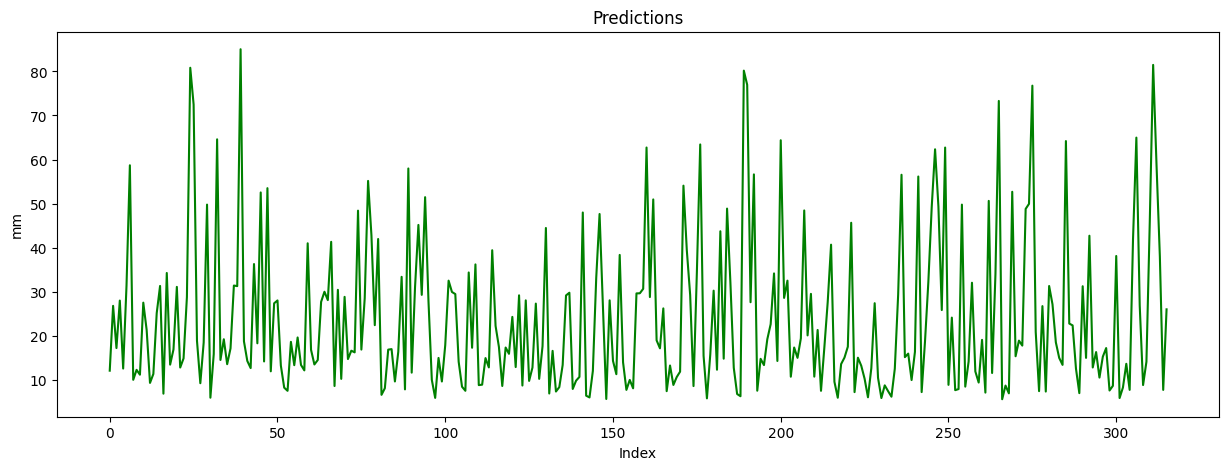

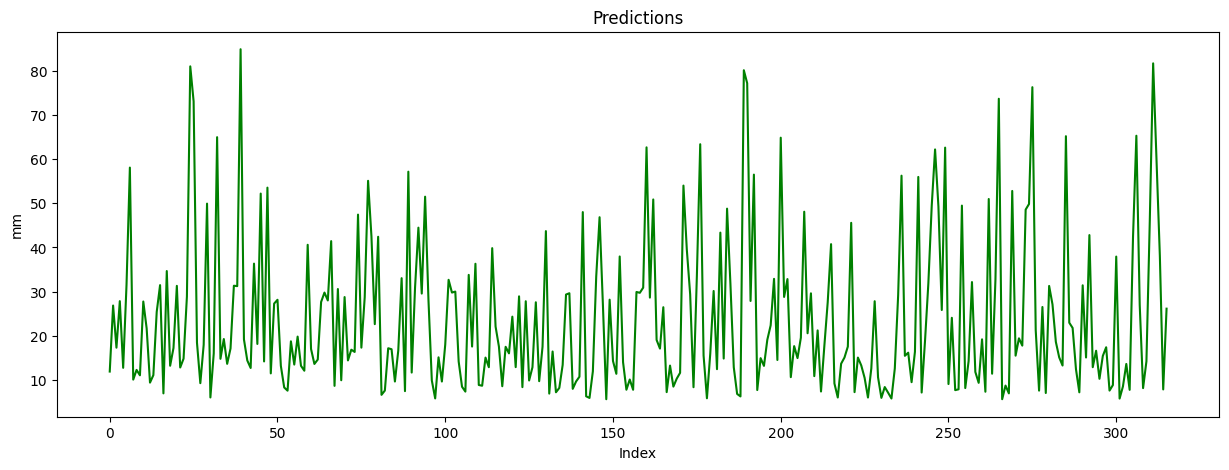

In [26]:
train_r2 = []
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('khorooji.xlsx', engine='xlsxwriter')

for i in range(1,4):
    rf = RandomForestRegressor(n_estimators     =1000,
                           criterion            ='squared_error',
                           max_depth            =15,
                           min_samples_split    =2,
                           min_samples_leaf     =1,
                           verbose              =0,
                           oob_score            =True)

    rf.fit(X_train, y_train)
    tr_rr = round(rf.score(X=X_train, y=y_train),2)
    train_r2.append(tr_rr)
    
    khorooji = rf.predict(X=voroodi)
    khorooji = pd.DataFrame(khorooji,index=voroodi.index,columns=["maroon"])

    plt.figure(figsize=(15,5))
    plt.plot(khorooji, color="green", ls="solid")
    plt.title("Predictions")
    plt.xlabel("Index")
    plt.ylabel("mm")
    plt.savefig(f"khorooji{i}")
    
    # Write each dataframe to a different worksheet.
    khorooji.to_excel(writer, sheet_name=str(f"model{i}"))

# Close the Pandas Excel writer and output the Excel file.
writer.save()

print(train_r2)
